In [0]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
!wget http://bit.ly/36je2mw -O /dbfs/cars.csv

--2023-07-04 18:23:39--  http://bit.ly/36je2mw
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/MikhailVV/DS/master/mtcars.csv [following]
--2023-07-04 18:23:39--  https://raw.githubusercontent.com/MikhailVV/DS/master/mtcars.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1501 (1.5K) [text/plain]
Saving to: ‘/dbfs/cars.csv’

/dbfs/cars.csv      100%[===================>]   1.47K  --.-KB/s    in 0s      

2023-07-04 18:23:39 (11.1 MB/s) - ‘/dbfs/cars.csv’ saved [1501/1501]



In [0]:
%sh ls -l /dbfs/

total 4
-rw-r--r-- 1 root root 1501 Jul  4 18:23 cars.csv


In [0]:
input_file = '/dbfs/cars.csv'
cars = pd.read_csv(input_file)

In [0]:
cars.index 

Out[5]: Index(['Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive',
       'Hornet Sportabout', 'Valiant', 'Duster 360', 'Merc 240D', 'Merc 230',
       'Merc 280', 'Merc 280C', 'Merc 450SE', 'Merc 450SL', 'Merc 450SLC',
       'Cadillac Fleetwood', 'Lincoln Continental', 'Chrysler Imperial',
       'Fiat 128', 'Honda Civic', 'Toyota Corolla', 'Toyota Corona',
       'Dodge Challenger', 'AMC Javelin', 'Camaro Z28', 'Pontiac Firebird',
       'Fiat X1-9', 'Porsche 914-2', 'Lotus Europa', 'Ford Pantera L',
       'Ferrari Dino', 'Maserati Bora', 'Volvo 142E'],
      dtype='object')

In [0]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   wt      32 non-null     float64
 5   qsec    32 non-null     float64
 6   am      32 non-null     int64  
 7   gear    32 non-null     int64  
 8   carb    32 non-null     int64  
dtypes: float64(4), int64(5)
memory usage: 2.5+ KB


In [0]:
cars.shape

Out[7]: (32, 9)

In [0]:
sns.set()
sns.set_style('whitegrid')

/databricks/python/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
Out[9]: <AxesSubplot:xlabel='hp', ylabel='Density'>

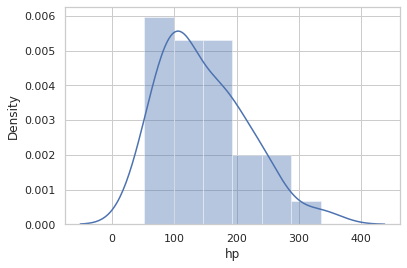

In [0]:
sns.distplot (cars.hp)

/databricks/python/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
Out[10]: <AxesSubplot:xlabel='hp', ylabel='Density'>

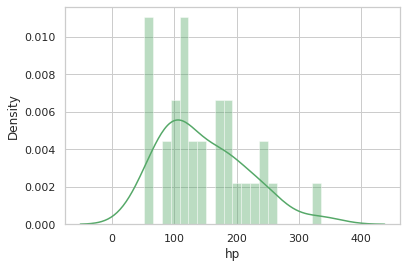

In [0]:
sns.distplot (cars.hp, color='g', bins=20) 

Out[11]: <seaborn.axisgrid.JointGrid at 0x7fd73aafbc40>

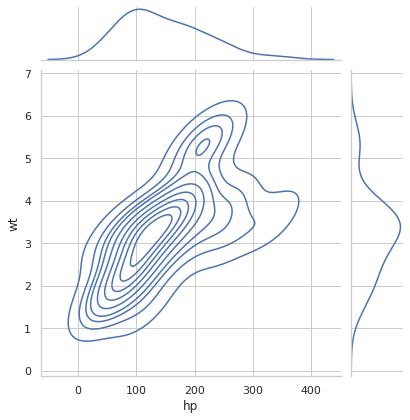

In [0]:
sns.jointplot(x="hp", y="wt", data=cars, kind="kde")

/databricks/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
Out[12]: <AxesSubplot:xlabel='qsec'>

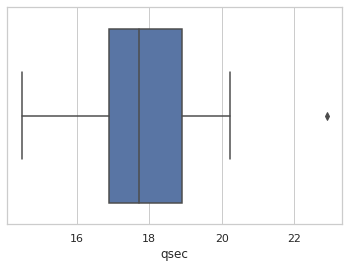

In [0]:
sns.boxplot(cars.qsec)

In [0]:
cars[cars.qsec > 22]

,mpg,cyl,disp,hp,wt,qsec,am,gear,carb
Merc 230,22.8,4,140.8,95,3.15,22.9,0,4,2


Out[14]: <seaborn.axisgrid.FacetGrid at 0x7fd7387901c0>

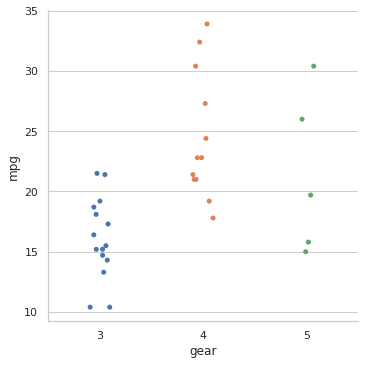

In [0]:
sns.catplot(x='gear', y = 'mpg', data = cars)

Out[15]: <seaborn.axisgrid.FacetGrid at 0x7fd73ac59c10>

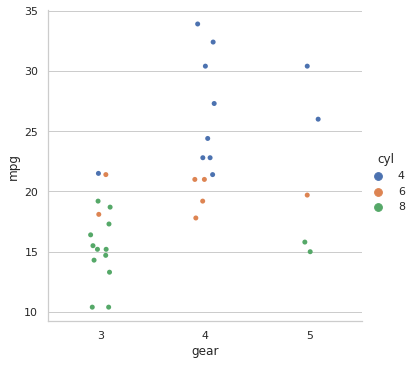

In [0]:
sns.catplot(x='gear', y = 'mpg', data = cars, hue = 'cyl')

Out[16]: <seaborn.axisgrid.FacetGrid at 0x7fd736680e50>

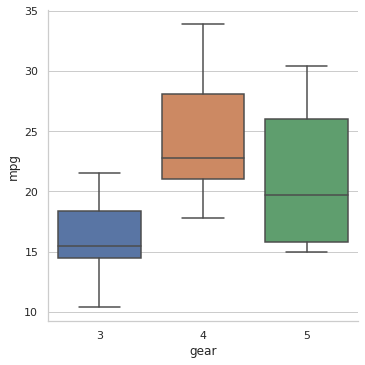

In [0]:
sns.catplot(x='gear', y = 'mpg', kind='box', data = cars)

In [0]:
columns = ['hp', 'wt', 'mpg', 'cyl', 'disp', 'qsec']
df2 = cars [columns].copy()

In [0]:
df2.shape

Out[18]: (32, 6)

Out[19]: <seaborn.axisgrid.PairGrid at 0x7fd7365c0dc0>

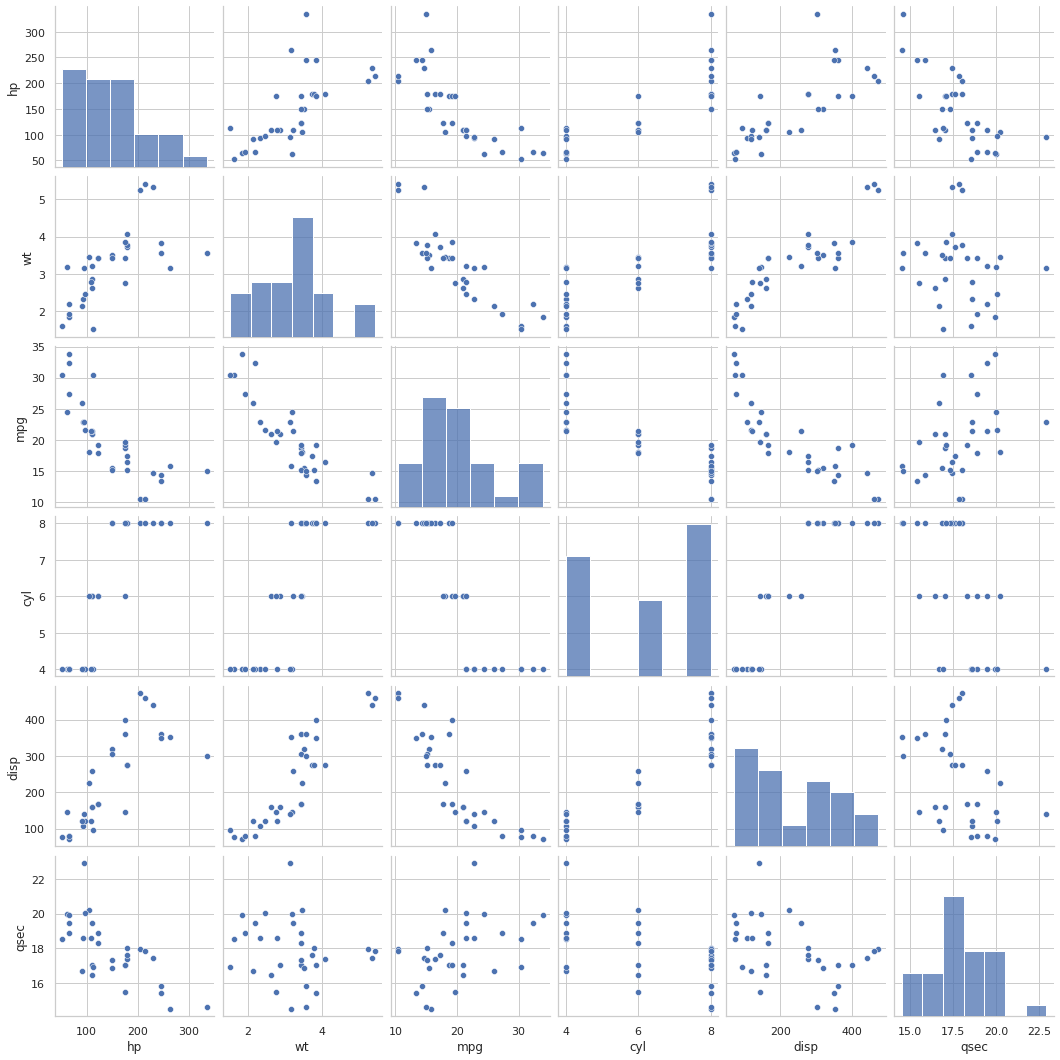

In [0]:
sns.pairplot(df2)   

Out[20]: <seaborn.axisgrid.PairGrid at 0x7fd7353f9cd0>

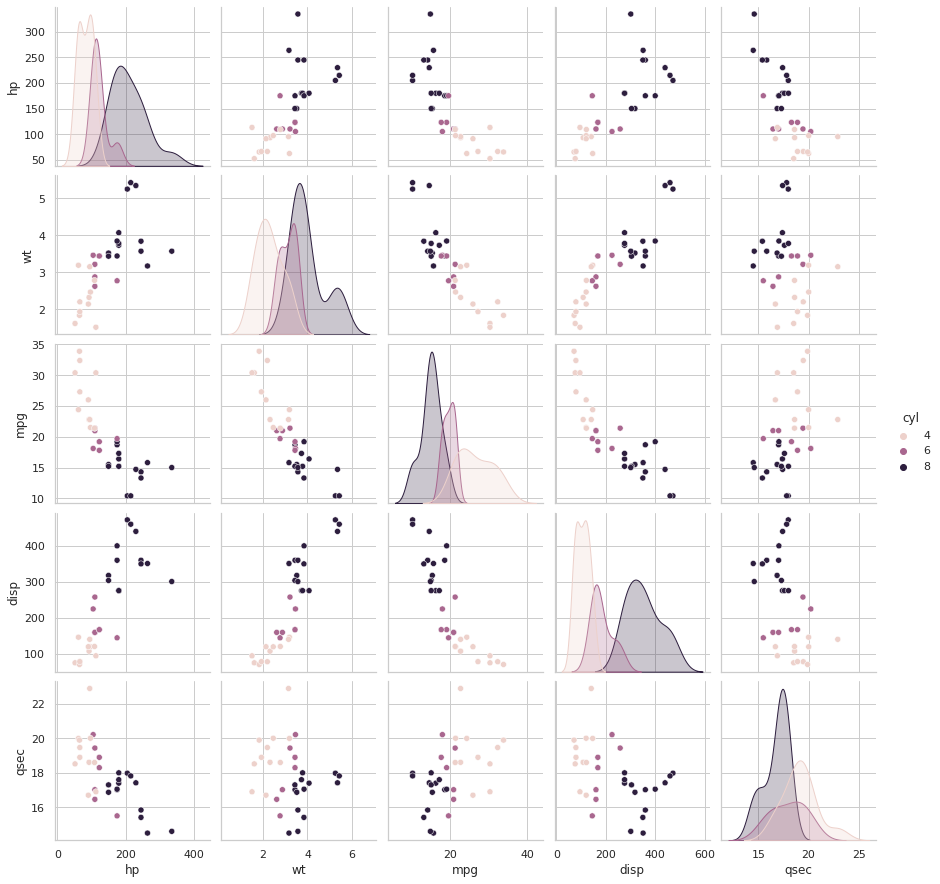

In [0]:
sns.pairplot(df2, hue='cyl')

Out[21]: <AxesSubplot:>

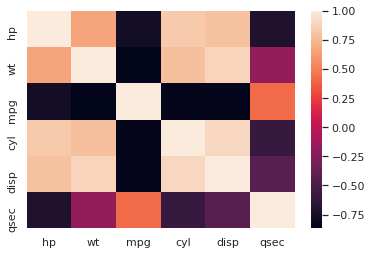

In [0]:
sns.heatmap(df2.corr())